<img src="./files/img/banistmo.png"\>

# Clase 2: ¿Como resolver problemas de Regresión?

<p>Los problemas de regresion involucran predecir el valor de una varibale que es continua (Salario, Ingreso, etc.).</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("files/dataset/class_02/salaries.csv", delimiter=",", low_memory=False)
print(df.shape)
df.head()

(148654, 13)


Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

In [3]:
df.describe()

Id       TotalPay  TotalPayBenefits           Year  Notes
count  148654.000000  148654.000000     148654.000000  148654.000000    0.0
mean    74327.500000   74768.321972      93692.554811    2012.522643    NaN
std     42912.857795   50517.005274      62793.533483       1.117538    NaN
min         1.000000    -618.130000       -618.130000    2011.000000    NaN
25%     37164.250000   36168.995000      44065.650000    2012.000000    NaN
50%     74327.500000   71426.610000      92404.090000    2013.000000    NaN
75%    111490.750000  105839.135000     132876.450000    2014.000000    NaN
max    148654.000000  567595.430000     567595.430000    2014.000000    NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
# vemos que la variable Notes no contiene info
df.drop('Notes', inplace=True, axis=1)

### Significado de axis
<b>axis</b> : {0 or ‘index’, 1 or ‘columns’}, default 0
        Axis along which the function is applied:
        0 or ‘index’: apply function to each column.
        1 or ‘columns’: apply function to each row.

In [6]:
#Veamos primero las variables que son string (objects)
df.select_dtypes(include='object').head()

EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits         Agency Status  
0  167411.18         0.0  400184.25      NaN  San Francisco    NaN  
1  155966.02   245131.88  137811.38      NaN  San Francisco    NaN  
2  212739.13   106088.18    16452.6      NaN  San Francisco    NaN  
3    77916.0    56120.71   198306.9      NaN  San Francisco    NaN  
4   134401.6      9737.0  182234.59      NaN  San Francisco    NaN

### Existen variables numericas que en vez de NaN tienen otras descripciones para eso se utiliza to_numeric


<b>errors</b> : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
            If ‘raise’, then invalid parsing will raise an exception
            If ‘coerce’, then invalid parsing will be set as NaN
            If ‘ignore’, then invalid parsing will return the input


In [7]:
#vemos que hay variables numericas pero que estan como strings...
df['BasePay'] = df['BasePay'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['OvertimePay'] = df['OvertimePay'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['OtherPay'] = df['OtherPay'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['Benefits']= df['Benefits'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# df[['BasePay','OvertimePay', 'OtherPay', 'Benefits']].apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=0).head()

### Ahora veamos los valores vacios (NaN):

Se pueden realizar tres tipos acciones para tratar los valores vacios:
<ol>
    <li>Eliminarlos: pero perdemos datos</li>
    <li>Imputarlos: Imputación significa reemplazarlos por medio de algun modelo</li>
</ol>

### Imputación:

<ul>
    <li>Reemplazarlos por una categorias o valores numerico por un valor que represente vacio y que haga sentido en el dominio en el que se aplica.</li>
    <li>Reemplazarlos con algun valor seleccionado de algun otro record de forma aleatoria</li>
    <li>Un valor de interpolacion como mediana, quantil, promedio, etc.</li>
    <li>Un valor estimado por algun otro modelo predictivo</li>
</ul>

In [8]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [9]:
#revisemos los valores vacios viendo el porcentaje de valores presentes
df.isna().apply(lambda x: x.sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

In [10]:
# la variable status contiene demasiados NaN no hace sentido tratar de recobrarla
df.drop('Status', inplace=True, axis=1)

In [11]:
#así estamos hasta ahora
df.isna().apply(lambda x: x.sum()).sort_values(ascending=False)

Benefits            36163
BasePay               609
OtherPay                4
OvertimePay             4
Agency                  0
Year                    0
TotalPayBenefits        0
TotalPay                0
JobTitle                0
EmployeeName            0
Id                      0
dtype: int64

### Imputemos los valores

# imputemos estas variables

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
#! conda update scikit-learn

<i>class sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, verbose=0, copy=True)</i>

<b>strategy</b> : string, optional (default=”mean”)
The imputation strategy.
<ul>
    <li>If <b>“mean”</b>, then replace missing values using the mean along each column. Can only be used with numeric data.</li>
    <li>If <b>“median”</b>, then replace missing values using the median along each column. Can only be used with numeric data.</li>
    <li>If <b>“most_frequent”</b>, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.</li>
    <li>If <b>“constant”</b>, then replace missing values with fill_value. Can be used with strings or numeric data.</li>
</ul>





In [14]:
# usemos un imputer con el promedio
imp = SimpleImputer(missing_values=np.nan, strategy='median')
impute_cols = ['Benefits','BasePay','OtherPay', 'OvertimePay']
# apliquemos el imputer
df[impute_cols] = imp.fit_transform(df[impute_cols])


In [15]:
# revisemos como estamos hasta ahora
df.isna().apply(lambda x: x.sum()/len(x)*100).sort_values(ascending=False)

Agency              0.0
Year                0.0
TotalPayBenefits    0.0
TotalPay            0.0
Benefits            0.0
OtherPay            0.0
OvertimePay         0.0
BasePay             0.0
JobTitle            0.0
EmployeeName        0.0
Id                  0.0
dtype: float64

 <b>Bien! ahora tenemos todo lleno 0% de valores vacios por medio de imputación con la media</b>

# Ahora codifiquemos las variables categoricas

In [16]:
# que tipos de variables tenemos
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object

In [17]:
#veamos las variables categoricas
df.select_dtypes('object').head()

EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

          Agency  
0  San Francisco  
1  San Francisco  
2  San Francisco  
3  San Francisco  
4  San Francisco

In [18]:
# saquemos EmployeeNamen y Id del dataset ya que el modelo debe ser irrelevante a la identidad del cliente
df.drop(['Id','EmployeeName'], axis=1, inplace=True)

### Codifiquemos las variables categoricas

In [19]:
# veamos como estamos hasta ahora
df.head(10)

JobTitle    BasePay  OvertimePay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18         0.00   
1                 CAPTAIN III (POLICE DEPARTMENT)  155966.02    245131.88   
2                 CAPTAIN III (POLICE DEPARTMENT)  212739.13    106088.18   
3            WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00     56120.71   
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60      9737.00   
5                       ASSISTANT DEPUTY CHIEF II  118602.00      8601.00   
6              BATTALION CHIEF, (FIRE DEPARTMENT)   92492.01     89062.90   
7                  DEPUTY DIRECTOR OF INVESTMENTS  256576.96         0.00   
8              BATTALION CHIEF, (FIRE DEPARTMENT)  176932.64     86362.68   
9          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  285262.00         0.00   

    OtherPay  Benefits   TotalPay  TotalPayBenefits  Year         Agency  
0  400184.25  28628.62  567595.43         567595.43  2011  San Francisco  
1  137811.38  28628.62  538909.28         538909.28  2011  San Francisco  
2   16452.60  28628.62  335279.91         335279.91  2011  San Francisco  
3  198306.90  28628.62  332343.61         332343.61  2011  San Francisco  
4  182234.59  28628.62  326373.19         326373.19  2011  San Francisco  
5  189082.74  28628.62  316285.74         316285.74  2011  San Francisco  
6  134426.14  28628.62  315981.05         315981.05  2011  San Francisco  
7   51322.50  28628.62  307899.46         307899.46  2011  San Francisco  
8   40132.23  28628.62  303427.55         303427.55  2011  San Francisco  
9   17115.73  28628.62  302377.73         302377.73  2011  San Francisco

In [20]:
# convirtamos las variables categoricas como categorias
df[['JobTitle','Agency','Year']] = df[['JobTitle','Agency','Year']].astype('category')

In [21]:
df.select_dtypes('category').describe()

JobTitle    Year         Agency
count             148654  148654         148654
unique              2159       4              1
top     Transit Operator    2014  San Francisco
freq                7036   38123         148654

In [22]:
# ES LO MISMO QUE ABAJO PERO LO HAGO DE OTRA FORMA
JobTitle_cat_map = [x for x in zip(df['JobTitle'].cat.categories, df['JobTitle'].cat.codes.unique())]
Agency_cat_map = [x for x in zip(df['Agency'].cat.categories, df['Agency'].cat.codes.unique())]
print(JobTitle_cat_map)
print(Agency_cat_map)

[('ACCOUNT CLERK', 831), ('ACCOUNTANT', 293), ('ACCOUNTANT INTERN', 2125), ('ACPO,JuvP, Juv Prob (SFERS)', 576), ('ACUPUNCTURIST', 64), ('ADMINISTRATIVE ANALYST', 243), ('ADMINISTRATIVE ANALYST II', 586), ('ADMINISTRATIVE ANALYST III', 324), ('ADMINISTRATIVE ENGINEER', 57), ('ADMINISTRATIVE SERVICES MANAGER', 712), ('ADMINISTRATOR, SFGH MEDICAL CENTER', 574), ('AFFIRMATIVE ACTION SPECIALIST', 357), ('AGRICULTURAL INSPECTOR', 295), ('AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI', 81), ('AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS', 296), ('AIRPORT COMMUNICATIONS OPERATOR', 325), ('AIRPORT COMMUNICATIONS SUPERVISOR', 575), ('AIRPORT ECONOMIC PLANNER', 912), ('AIRPORT ELECTRICIAN', 682), ('AIRPORT ELECTRICIAN SUPERVISOR', 10), ('AIRPORT EMERGENCY PLANNING COORDINATOR', 1047), ('AIRPORT MECHANICAL MAINTENANCE SUPERVISOR', 794), ('AIRPORT NOISE ABATEMENT SPECIALIST', 1272), ('AIRPORT OPERATIONS SUPERVISOR', 1125), ('AIRPORT POLICE SERVICES AIDE', 1049), ('AIRPORT PROPERTY SPECIALIST

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#['JobTitle','Agency','Year']
df['JobTitle'] = le.fit_transform(df['JobTitle'])
df['Agency'] = le.fit_transform(df['Agency'])
df['Year'] = le.fit_transform(df['Year'])

In [23]:
# Podemos ver como Agency tiene solo una categoria asi que la eliminamos
df.drop('Agency', inplace=True, axis=1)

In [24]:
# aplicar el encoding (pero si usaron Label encoder no)
df['JobTitle'] = df['JobTitle'].cat.codes
df['Year'] = df['Year'].cat.codes

In [25]:
df.dtypes

JobTitle              int16
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                   int8
dtype: object

# Ahora a visualizamos las correlaciones entre las variables

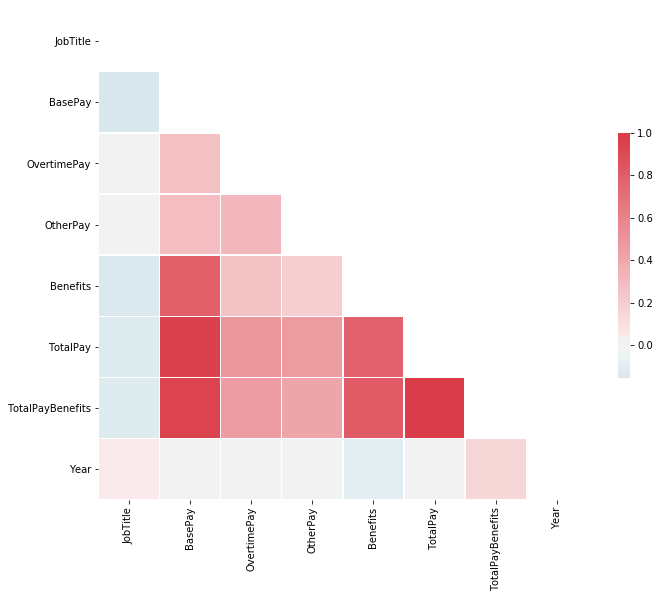

In [26]:
#mejor se ve visualizando

# calcular la matriz de correlaciones [-1,+1] 
corr = df.corr(method='pearson') # pearson, spearman y kendall

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
# veamos la matrix de correlacion
corr

JobTitle   BasePay  OvertimePay  OtherPay  Benefits  \
JobTitle          1.000000 -0.152175     0.027841 -0.029999 -0.140569   
BasePay          -0.152175  1.000000     0.266688  0.283747  0.797311   
OvertimePay       0.027841  0.266688     1.000000  0.316594  0.263699   
OtherPay         -0.029999  0.283747     0.316594  1.000000  0.202007   
Benefits         -0.140569  0.797311     0.263699  0.202007  1.000000   
TotalPay         -0.126499  0.950689     0.504860  0.470495  0.773559   
TotalPayBenefits -0.120566  0.943166     0.467984  0.422341  0.814595   
Year              0.045861  0.033682     0.027870 -0.002511 -0.116167   

                  TotalPay  TotalPayBenefits      Year  
JobTitle         -0.126499         -0.120566  0.045861  
BasePay           0.950689          0.943166  0.033682  
OvertimePay       0.504860          0.467984  0.027870  
OtherPay          0.470495          0.422341 -0.002511  
Benefits          0.773559          0.814595 -0.116167  
TotalPay          1.000000          0.977313  0.032090  
TotalPayBenefits  0.977313          1.000000  0.151947  
Year              0.032090          0.151947  1.000000

In [28]:
# ahora mostremos de mejor manera
def color_red_or_green(val):
    color = 'red' if val > 0.9 else 'black'
    if val > 0.9 and val != 1.0:
        color = 'red'
    elif val < -0.9:
        color = 'green'
    else:
        color = 'white'
    return 'color: %s' % color
corr.style.applymap(color_red_or_green)

### BasePay esta altamente correlacionado con TotalPay y TotalPayBenefits
Podriamos escoger solo una de ellas porque escoger cualquiera de ella muy probablemente aporta la misma cantidad de informacion

<ul>
    <li>TotalPay | BasePay = 0.950514</li>
    <li>TotalPayBenefits | BasePay = 0.950514</li>
    <li>TotalPayBenefits | TotalPay = 0.977313</li>
</ul>





In [50]:
df_fixed = df.drop(['TotalPayBenefits'], axis=1, inplace=False)

In [51]:
# tambien podemos mostrar las relaciones de las variables si quisieramos
#sns.pairplot(df_fixed, hue="Year", vars=df_fixed.columns.tolist())

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# si tienen que usar shuffle=False (para identificar el cliente de la predicción)
# tienen que realizar el shuffle desde pandas de esta manera:

In [54]:
df_fixed = df_fixed.sample(frac=1.0, random_state=123)

In [55]:
# ahora vamos a predecir la variable BasePay
X = df_fixed.drop("TotalPay", axis = 1).values
y = df_fixed['TotalPay'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=False,
                                                    random_state=123)

## Establezcamos los rangos de busqueda del optimizador de parametros

In [56]:
# ahora establezcamos los rangos de busqueda la optimizacion de los parametros del modelo

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start = 20, stop = 80, num = 5)]
max_depth.append(None)

min_samples_split = [2, 3, 5]

min_samples_leaf = [1, 2, 4,]

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
print(random_grid)

{'n_estimators': [50, 62, 75, 87, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 35, 50, 65, 80, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Ahora iniciemos el regresor con su respectivo optimizador de parametros

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=3,
                               random_state=123,
                               n_jobs = 4)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [50, 62, 75, 87, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 35, 50, 65, 80, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [59]:
# Veamos el mejor set de parametros
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 62}

In [60]:
# veamos el mejor score
rf_random.best_score_

0.9986932958676017

## Veamos las metricas de desempeño del modelo

In [61]:
from sklearn import metrics
y_pred = rf_random.best_estimator_.predict(X_test)

print('r2: ', metrics.r2_score(y_test, rf_random.best_estimator_.predict(X_test)))
print('MAE: ', metrics.mean_absolute_error(y_test, rf_random.best_estimator_.predict(X_test)))


def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+1))) * 100

print('MAPE: ', mape(y_test, rf_random.best_estimator_.predict(X_test)))


r2:  0.9975060248113987
MAE:  306.2837860404349
MAPE:  37.651923694620315


### Comparemos con un dummy regressor

DummyRegressor also implements four simple rules of thumb for regression:
<li><b>mean</b> always predicts the mean of the training targets.</li>
<li><b>median</b> always predicts the median of the training targets.</li>
<li><b>quantile</b> always predicts a user provided quantile of the training targets.</li>
<li><b>constant</b> always predicts a constant value that is provided by the user.</li>

In [62]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy='median', constant=None, quantile=0.75)
dummy_reg.fit(X_train, y_train)
print(dummy_reg.score(X_test,y_test))

-0.005372493521782706


In [63]:
print('r2: ', metrics.r2_score(y_test, dummy_reg.predict(X_test)))
print('MAE: ', metrics.mean_absolute_error(y_test, dummy_reg.predict(X_test)))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+1))) * 100

print('MAPE: ', mape(y_test, dummy_reg.predict(X_test)))


r2:  -0.005372493521782706
MAE:  40132.10560351593
MAPE:  18807.84095533083


# Grafiquemos la distribucion de los salarios

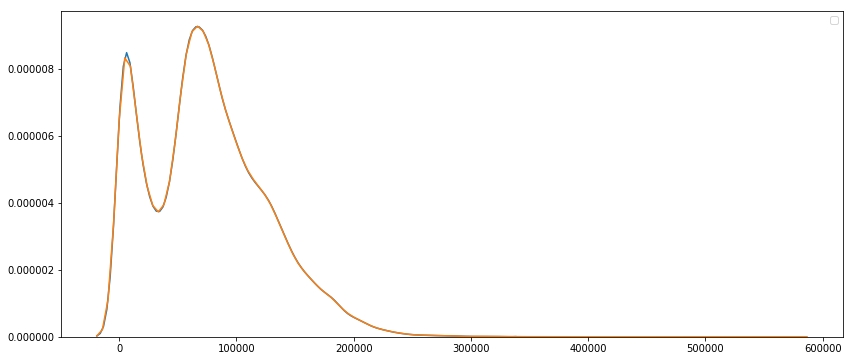

In [64]:
fig = plt.figure(figsize=(14,6))
a = sns.kdeplot(y_pred, legend='pred')
b = sns.kdeplot(y_test,legend='actual')
a.legend('pred')
b.legend('actual')

# Veamos que tanto sobre-estima y que tanto subestima

In [65]:
df_pred = pd.DataFrame({'BasePay_pred': y_pred,
                        'BasePay_actual': y_test})
df_pred.head()

BasePay_pred  BasePay_actual
0   3925.213089         3925.60
1   5550.396720         5562.64
2  26358.904527        26453.36
3  55191.274866        55421.78
4  16995.607018        17048.68

In [66]:
# calculemos la diferencia entre lo actual y lo predicho
df_pred['compared_diff'] = ((df_pred['BasePay_pred']-df_pred['BasePay_actual'])/df_pred['BasePay_actual'])*100
df_pred.head()

BasePay_pred  BasePay_actual  compared_diff
0   3925.213089         3925.60      -0.009856
1   5550.396720         5562.64      -0.220098
2  26358.904527        26453.36      -0.357064
3  55191.274866        55421.78      -0.415911
4  16995.607018        17048.68      -0.311303

In [67]:
above_115_perc = df_pred['compared_diff'][df_pred['compared_diff'] >= 15.].count()
print('arriba del 15% del valor actual', above_115_perc)

arriba del 15% del valor actual 16


In [68]:
df_pred[df_pred['compared_diff'] >= 15.].head()

BasePay_pred  BasePay_actual  compared_diff
1768       64.111344           37.23      72.203449
4436   100742.772110        86651.35      16.262207
13730       1.400398            0.30     366.799283
16049       6.586414            4.17      57.947577
18294     559.227231          481.02      16.258624

In [69]:
below_85_perc = df_pred['compared_diff'][df_pred['compared_diff'] <= -15.].count()
print('debajo del 15% del valor actual', below_85_perc)

debajo del 15% del valor actual 62


In [70]:
df_pred[df_pred['compared_diff'] <= -15.].head()

BasePay_pred  BasePay_actual  compared_diff
318     3873.281554         5777.62     -32.960604
1365  294378.379016       350403.41     -15.988723
3112   72557.175757        89159.71     -18.621117
3197  186481.522907       220356.48     -15.372798
4239  308135.726065       362844.66     -15.077784

(-100, 100.0)

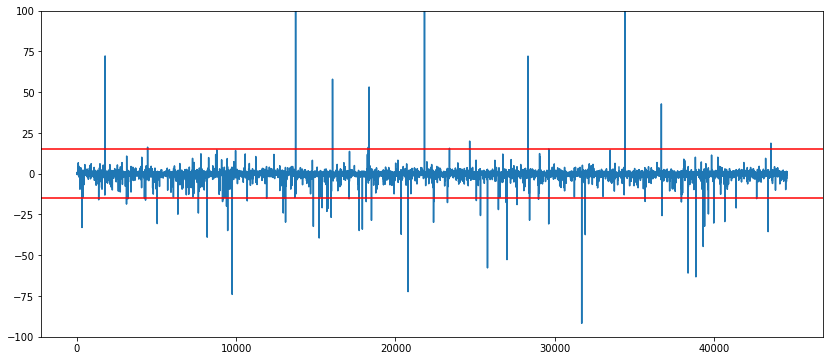

In [71]:
# veamos las bandas de aceptacion del -15% + 15%
plt.figure(figsize=(14,6))
plt.plot(df_pred.compared_diff)
plt.axhline(y=-15., color='r', linestyle='-')
plt.axhline(y=+15., color='r', linestyle='-')
plt.ylim(top=100)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-100)  # adjust the bottom leaving top unchanged

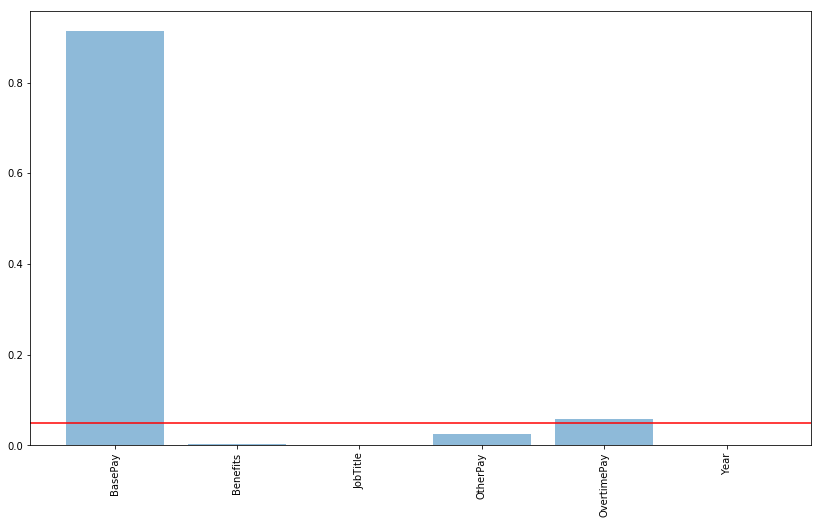

In [72]:
feat_imp_01 = rf_random.best_estimator_.feature_importances_
feat_cols_01 = df_fixed.drop('TotalPay', axis=1).columns.tolist()
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(feat_cols_01, feat_imp_01, align='center', alpha=0.5)
plt.xticks(rotation=90)

top_var_01 = pd.DataFrame({'features':np.array(feat_cols_01),
                        'importance':np.array(feat_imp_01)},)

q3_01 = top_var_01['importance'].quantile(.75) # 75% and above
plt.axhline(y=q3_01, color='r', linestyle='-')

In [73]:
df_fixed.dtypes

JobTitle         int16
BasePay        float64
OvertimePay    float64
OtherPay       float64
Benefits       float64
TotalPay       float64
Year              int8
dtype: object

# Ahora Veamos el efecto de las variables en la prediccion (SHAP)

In [74]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_random.best_estimator_)

In [75]:
shap_values = explainer.shap_values(X_test[:100])

In [90]:
item = 51
shap.force_plot(explainer.expected_value,
                shap_values[item], features=X_test[:100][item],
                feature_names=df_fixed.drop("TotalPay", axis = 1).columns )

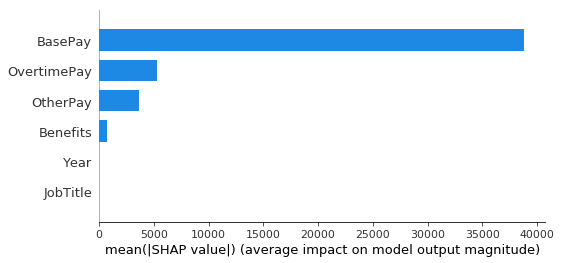

In [77]:
shap.summary_plot(shap_values,features=X_test[:100], feature_names=df_fixed.drop("TotalPay", axis = 1).columns, plot_type='bar')

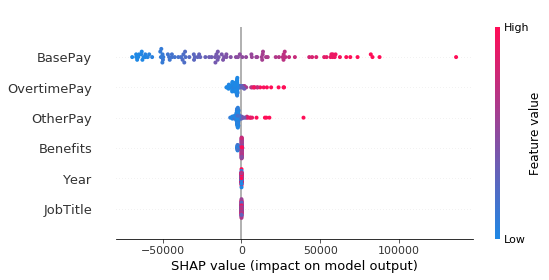

In [78]:
shap.summary_plot(shap_values,features=X_test[:100], feature_names=df_fixed.drop("TotalPay", axis = 1).columns)